LabTask_02_IRIS_Dataset_Classification

Mehwish Shabir

In [53]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#load the dataset
iris = load_iris()
X = iris.data

In [4]:
#One-hot encode the target labels
y = to_categorical(iris.target)

In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [7]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (120, 4)
Shape of y_train: (120, 3)
Shape of X_test: (30, 4)
Shape of y_test: (30, 3)


In [8]:

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50,
validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5590 - loss: 0.9784 - val_accuracy: 0.5333 - val_loss: 0.9559
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5852 - loss: 0.9578 - val_accuracy: 0.6000 - val_loss: 0.9303
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6046 - loss: 0.9425 - val_accuracy: 0.6667 - val_loss: 0.9060
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6142 - loss: 0.9168 - val_accuracy: 0.6667 - val_loss: 0.8834
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6029 - loss: 0.8985 - val_accuracy: 0.6667 - val_loss: 0.8629
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6327 - loss: 0.8802 - val_accuracy: 0.6667 - val_loss: 0.8441
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6583 - loss: 0.8700 - val_accuracy: 0.7000 - val_loss: 0.8258
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7008 - loss: 0.8475 - val_accuracy: 0.7000 - val_loss: 0.8082


In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3276
Test Accuracy: 0.9333


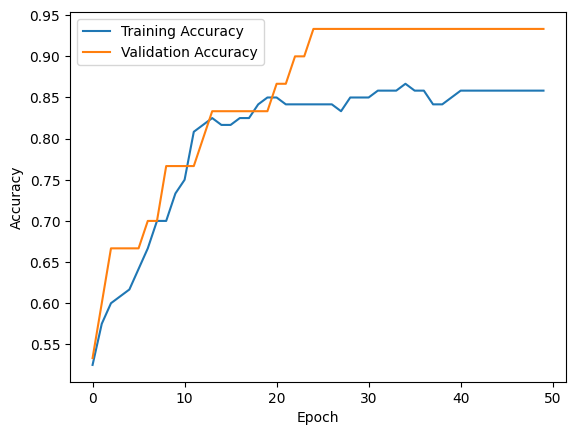

In [52]:
#Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


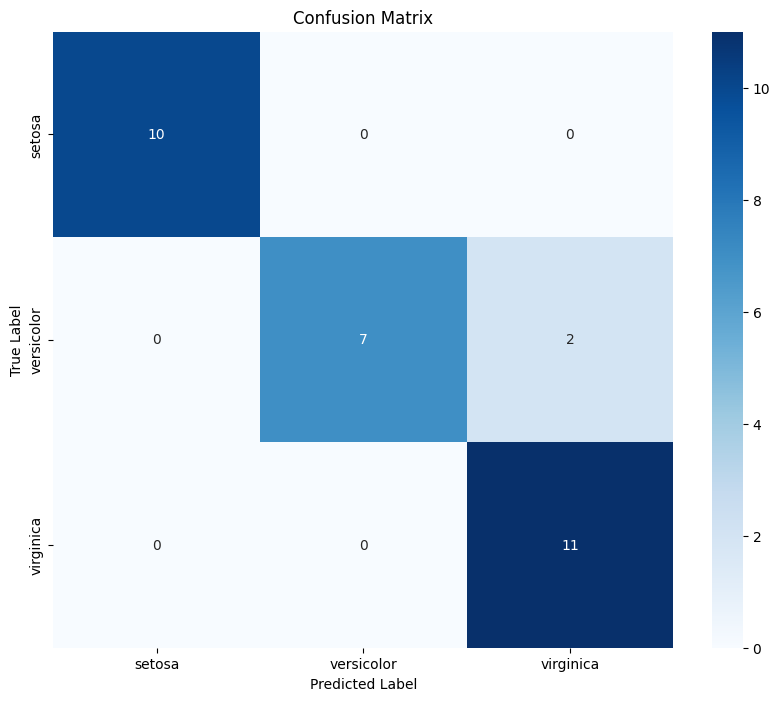

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [58]:
# Get predictions for the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the class names from the iris dataset
class_names = iris.target_names

# Generate Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

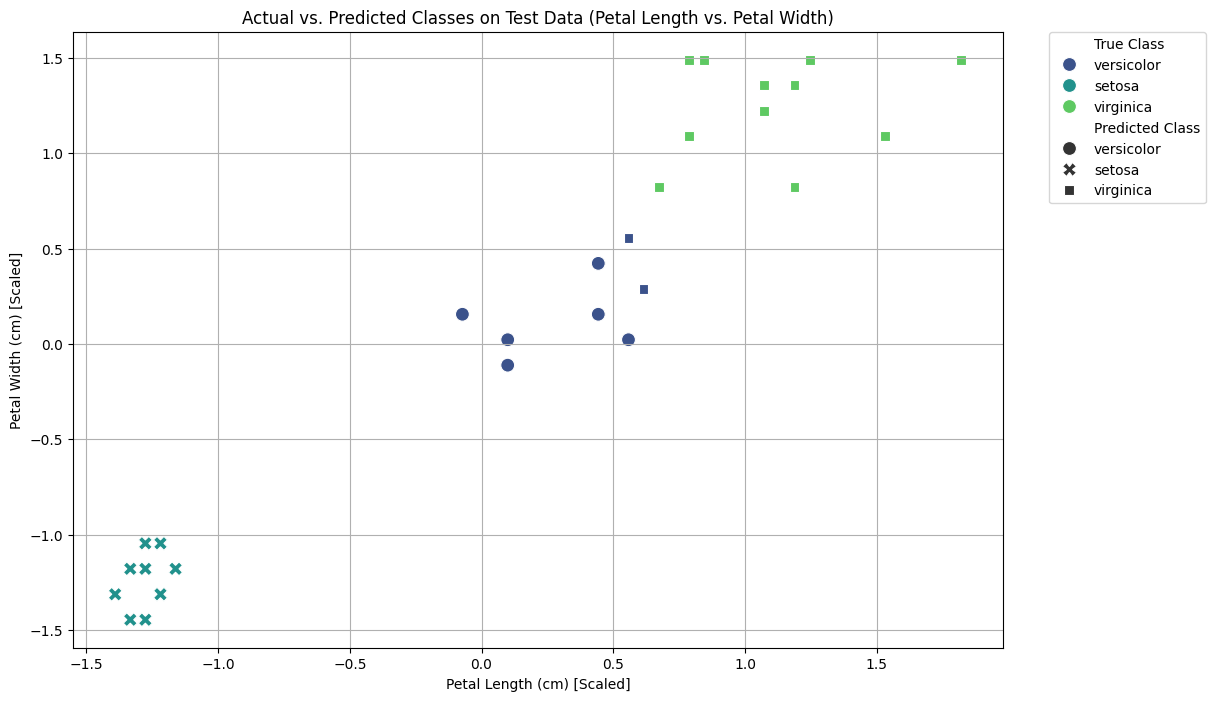

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get class names from the iris dataset
class_names = iris.target_names

# Create a DataFrame for visualization
# Using the raw feature names for clarity, though we are plotting scaled data
feature_names = iris.feature_names

df_test_viz = pd.DataFrame(X_test, columns=feature_names)
df_test_viz['True Class'] = [class_names[c] for c in y_true_classes]
df_test_viz['Predicted Class'] = [class_names[c] for c in y_pred_classes]

# Visualize 'Petal length (cm)' vs 'Petal width (cm)' as they are often most discriminative
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_test_viz,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='True Class',        # Color by true class
    style='Predicted Class', # Mark by predicted class
    markers=True,            # Show markers for style
    s=100,                   # Set marker size
    palette='viridis'        # Choose a color palette
)
plt.title('Actual vs. Predicted Classes on Test Data (Petal Length vs. Petal Width)')
plt.xlabel('Petal Length (cm) [Scaled]')
plt.ylabel('Petal Width (cm) [Scaled]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

In [61]:
print("Displaying the first 10 samples from the test set with scaled features, true class, and predicted class:")
display(df_test_viz.head(10))

Displaying the first 10 samples from the test set with scaled features, true class, and predicted class:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),True Class,Predicted Class
0,0.354517,-0.585060,0.557775,0.022248,versicolor,versicolor
1,-0.133071,1.650837,-1.161395,-1.179118,setosa,setosa
2,2.304867,-1.032239,1.818500,1.490583,virginica,virginica
3,0.232620,-0.361470,0.443164,0.422703,versicolor,versicolor
4,1.207795,-0.585060,0.615081,0.289218,versicolor,virginica
5,-0.498762,0.756479,-1.276006,-1.045633,setosa,setosa
6,-0.254968,-0.361470,-0.072587,0.155733,versicolor,versicolor
7,1.329692,0.085709,0.786998,1.490583,virginica,virginica
8,0.476414,-1.926598,0.443164,0.422703,versicolor,versicolor
9,-0.011174,-0.808649,0.099330,0.022248,versicolor,versicolor
